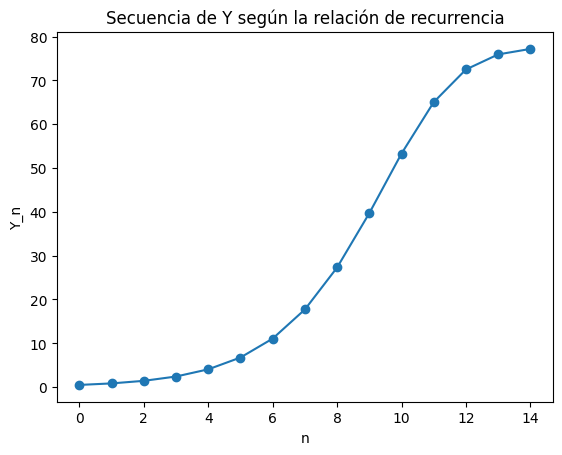

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros iniciales
a = 1.7  # Valor de a (constante)
b = 0.009  # Valor de b (constante)
Y_0 = 0.5  # Condición inicial

# Número de iteraciones
n = 15

# Arreglo para almacenar los valores de Y
Y_values = np.zeros(n)
Y_values[0] = Y_0

# Generar la secuencia de Y usando la relación de recurrencia
for i in range(1, n):
    Y_values[i] = (a - b * Y_values[i-1]) * Y_values[i-1]

# Visualización de los datos generados
plt.plot(range(n), Y_values, marker='o')
plt.title('Secuencia de Y según la relación de recurrencia')
plt.xlabel('n')
plt.ylabel('Y_n')
plt.show()


# Enfoque con $\Delta{Y_{n+1} }/{y_n}$

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



# Calcular la variable dependiente 
Y_ratio = Y_values[1:] / Y_values[:-1]
# corregir para que ambas dimensiones sean iguales
Y_values = Y_values[:-1]
Y_ratio = Y_ratio[:]



print(Y_values.shape)
print(Y_ratio.shape)



slope, intercept = stats.linregress(Y_values, Y_ratio)[:2]
slope = -1 * slope
print(f'Pendiente: {slope}, Intersección: {intercept}')



(7,)
(7,)
Pendiente: 0.009000000000000001, Intersección: 1.7


# Enfoque el uso de la librería scikit-learn para la regresión lineal. 

In [17]:
from sklearn.linear_model import LinearRegression

# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(Y_values.reshape(-1, 1), Y_ratio)

# Obtener la pendiente y la intersección
slope, intercept = -1*model.coef_[0], model.intercept_
print(f'Pendiente: {slope}, Intersección: {intercept}')

Pendiente: 0.009000000000000003, Intersección: 1.7000000000000002


## Datos obtenidos (puntos azules) y la recta de regresión lineal (línea roja) que mejor se ajusta a los datos.

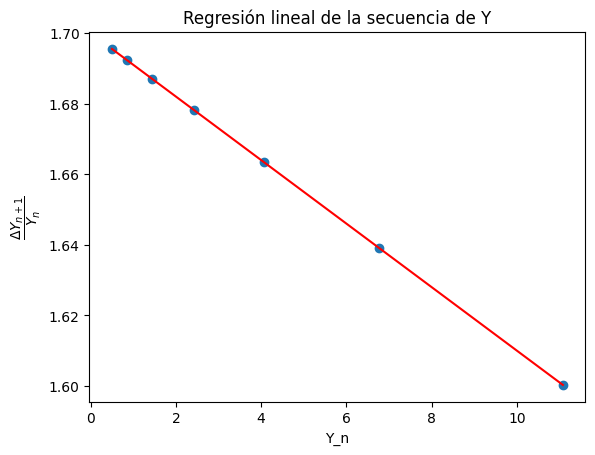

In [24]:
plt.scatter(Y_values, Y_ratio)
plt.plot(Y_values, model.predict(Y_values.reshape(-1, 1)), color='red')
plt.title('Regresión lineal de la secuencia de Y')
plt.xlabel('Y_n')
plt.ylabel('${\dfrac{\Delta Y_{n+1}}{Y_n}}$')
plt.show()
